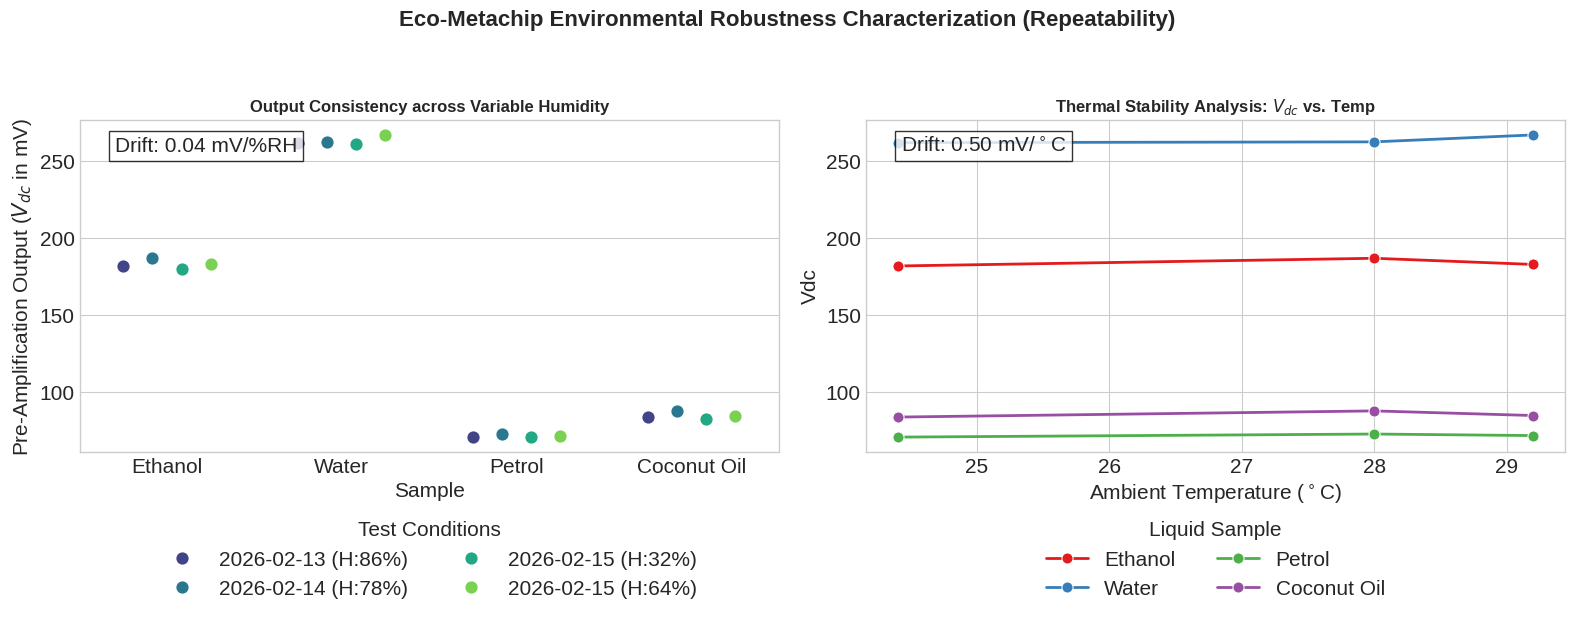

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams.update({'font.size': 15})

# 1. Load your dataset
df = pd.read_csv('complete_preampobslog.csv')
df.columns = ['Date', 'Humidity', 'Temp', 'Sample', 'Vdc'] # Normalize names
df['Session'] = df['Date'] + " (H:" + df['Humidity'].astype(str) + "%)"
df_temp = df.dropna(subset=['Temp'])

# 2. Setup Figure
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- Subplot 1: Humidity Robustness ---
sns.pointplot(data=df, x='Sample', y='Vdc', hue='Session', 
              linestyles='none', dodge=0.5, palette='viridis', ax=ax1)
ax1.set_title('Output Consistency across Variable Humidity', fontsize=12, fontweight='bold')
ax1.set_ylabel(r'Pre-Amplification Output ($V_{dc}$ in mV)')

# Calculate and add Humidity Coefficient
h_slope, _, _, _, _ = stats.linregress(df['Humidity'], df['Vdc'])
ax1.text(0.05, 0.95, fr'Drift: {h_slope:.2f} mV/%RH', transform=ax1.transAxes, 
         bbox=dict(facecolor='white', alpha=0.8), verticalalignment='top')

# --- Subplot 2: Thermal Stability ---
sns.lineplot(data=df_temp, x='Temp', y='Vdc', hue='Sample', 
             marker='o', markersize=8, linewidth=2, palette='Set1', ax=ax2)
ax2.set_title(r'Thermal Stability Analysis: $V_{dc}$ vs. Temp', fontsize=12, fontweight='bold')
ax2.set_xlabel(r'Ambient Temperature ($^\circ$C)')

# Calculate and add Thermal Coefficient
t_slope, _, _, _, _ = stats.linregress(df_temp['Temp'], df_temp['Vdc'])
ax2.text(0.05, 0.95, fr'Drift: {t_slope:.2f} mV/$^\circ$C', transform=ax2.transAxes, 
         bbox=dict(facecolor='white', alpha=0.8), verticalalignment='top')

# Formatting
plt.suptitle('Eco-Metachip Environmental Robustness Characterization (Repeatability)', fontsize=16, fontweight='bold', y=0.98)
ax1.legend(title='Test Conditions', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
ax2.legend(title='Liquid Sample', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.savefig('env_repeatability_analysis.png', dpi=300)
plt.show()

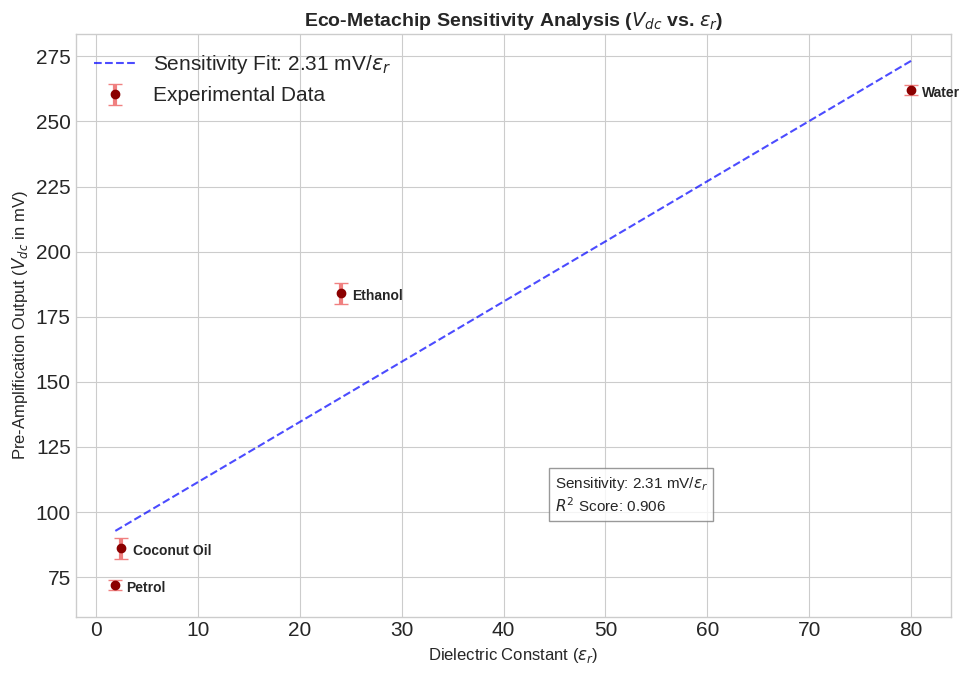

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

plt.rcParams.update({'font.size': 15})

# 1. Load the data
df = pd.read_csv('general_preampobs.csv')
df.columns = ['Sample', 'Dielectric', 'Mean', 'Min', 'Max']

# 2. Extract variables
X = df['Dielectric'].values
Y = df['Mean'].values
Y_err_min = Y - df['Min'].values
Y_err_max = df['Max'].values - Y

# 3. Perform Linear Regression
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# 4. Create the Plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 7))

# Plot experimental points with error bars
plt.errorbar(X, Y, yerr=[Y_err_min, Y_err_max], fmt='o', color='darkred', 
             ecolor='lightcoral', elinewidth=3, capsize=5, label='Experimental Data')

# Plot Trendline - fr string allows both {variables} and \latex symbols
x_fit = np.linspace(X.min(), X.max(), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, 'b--', alpha=0.7, label=fr'Sensitivity Fit: {slope:.2f} mV/$\epsilon_r$')

# 5. ANNOTATE LIQUIDS
for i, txt in enumerate(df['Sample']):
    plt.annotate(txt, (X[i], Y[i]), xytext=(8, -5), textcoords='offset points', 
                 ha='left', fontsize=10, fontweight='bold')

# 6. Formatting for APSCON
plt.title(r'Eco-Metachip Sensitivity Analysis ($V_{dc}$ vs. $\epsilon_r$)', fontsize=14, fontweight='bold')
plt.xlabel(r'Dielectric Constant ($\epsilon_r$)', fontsize=12)
plt.ylabel(r'Pre-Amplification Output ($V_{dc}$ in mV)', fontsize=12)

# Stats Box - THE FIX: Using fr-string here solves the SyntaxWarning
stats_text = (fr'Sensitivity: {slope:.2f} mV/$\epsilon_r$' + '\n' + 
              fr'$R^2$ Score: {r_value**2:.3f}')

plt.text(45, 100, stats_text, fontsize=11, bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('sensitivity_analysis.png', dpi=300)
plt.show()